['#d4e0e6', '#93706f']

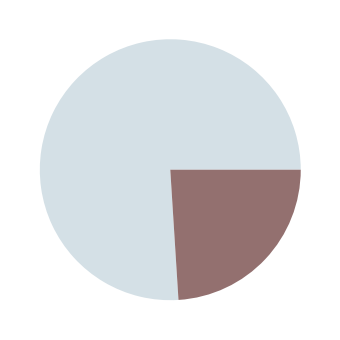

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import json

%matplotlib inline

# image = cv2.imread('img/backgroundPicture.jpg')
# print("The type of this input is {}".format(type(image)))
# print("Shape: {}".format(image.shape))
# plt.imshow(image)

# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.imshow(image)

# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_image, cmap='gray')


# resized_image = cv2.resize(image, (1200, 600))
# plt.imshow(resized_image)

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def get_colors(image, number_of_colors, show_chart):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors, textprops={'color':"w"})
        
    # for el in range(len(hex_colors)):
    #     print('Color ' + str(el + 1) + ': ' + hex_colors[el])

    with open('data.json', 'w') as f:
        json.dump(hex_colors, f)

    return hex_colors


get_colors(get_image('img/backgroundPicture.jpg'), 2, True)